In [1]:
# Import C++ perceptron implementation
import pyneuralnet as nn
# Import other libraries
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
np.random.seed(123)

In [2]:
N = 2
a = 0.0000001
AdamArgs = (0.9, 0.999)

In [3]:
layers = [
    nn.fullconnect.TanH(784, 500, *AdamArgs), 
    nn.fullconnect.ReLU(500, 300, *AdamArgs), 
    nn.fullconnect.ReLU(300, 100, *AdamArgs), 
    nn.fullconnect.ReLU(100, 100, *AdamArgs), 
    nn.fullconnect.ReLU(100, 50, *AdamArgs), 
    nn.fullconnect.SoftMax(50, 10, *AdamArgs)
]

In [4]:
model = nn.compound.Sequence(*layers)

In [5]:
# Load training data
class Data(nn.abstract.DataSource):
    def __init__(self):
        super().__init__()
        self.TRAIN_IN, self.TRAIN_OUT = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
    
    def size(self):
        return len(self.TRAIN_IN)
    
    def sample(self, i):
        out = np.zeros((10,1))
        out[self.TRAIN_OUT[i]] = 1.0
        return (self.TRAIN_IN[i], out)

data = Data()
loss = nn.loss.L2()

In [6]:
trainer = nn.training.Trainer(model, data, loss)

Training of model complete in 74.70423829555511 seconds per epoch.


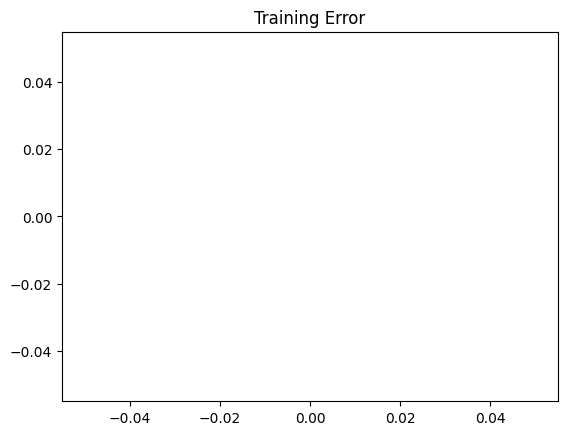

In [7]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of model complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()

In [8]:
import pickle

bts = pickle.dumps(model)
sour_model = pickle.loads(bts)
out1 = model.forward(data.sample(0)[0])
out2 = sour_model.forward(data.sample(0)[0])
diff = abs(out1 - out2)
print(f"{np.min(diff)} - {np.mean(diff)} - {np.max(diff)}")

nan - nan - nan
